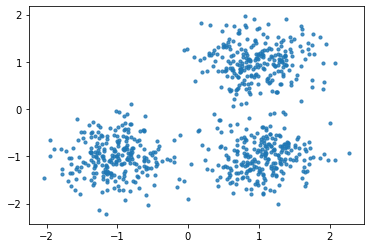

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

In [8]:
def euclidean_dist(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - y[i])**2
    return res**(1/2)

In [24]:
class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts 
        self.epsilon = epsilon

    def snapshot(self, P_index, assignments):
        fig, ax = plt.subplots()
        colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
        ax.scatter(self.dataset[:, 0], self.dataset[:, 1], color=colors[assignments].tolist(), s=10, alpha=0.8)

        cir = plt.Circle(self.dataset[P_index], self.epsilon, fill = False, alpha=0.8) # create circle around the scatters
        ax.add_patch(cir)
        ax.set_aspect('equal') # necessary or else the circles appear to be oval shaped

        fig.savefig('temp.png')
        plt.close()



    def epsilon_neighborhood(self, P_index):
        # search for points in neighborhood
        neighborhood = []
        for PN in range(len(self.dataset)): # PN is the index
            if P_index != PN and euclidean_dist(self.dataset[PN], self.dataset[P_index]) <= self.epsilon: # if in neighborhood
                # add to the cluster
                neighborhood.append(PN)
        return neighborhood

    def explore_and_assign_eps_neighborhood(self, P_index, cluster, assignments):

        neighborhood = self.epsilon_neighborhood(P_index)

        while neighborhood:
            neighbor_of_P = neighborhood.pop()
            if assignments[neighbor_of_P] != 0: # only assigning if have not been assigned yet
                continue

            assignments[neighbor_of_P] = cluster 
            self.snapshot(neighbor_of_P, assignments)

            next_neighborhood = self.epsilon_neighborhood(neighbor_of_P)

            # if it's a core point
            if len(next_neighborhood) >= self.min_pts:
                # this is a core point
                # neighbors should be explored/assigned also
                neighborhood.extend(next_neighborhood) # merge list to list
        return assignments

    def dbscan(self):
        assignments = [0 for x in range(len(self.dataset))] # assign cluster
        cluster = 1

        for P_index in range(len(self.dataset)):
            if assignments[P_index] != 0:
                # if already assigned to a cluster
                continue
            if len(self.epsilon_neighborhood(P_index)) >= self.min_pts: # if number in neighborhood >= min_pts
                #core points
                assignments = self.explore_and_assign_eps_neighborhood(P_index, cluster, assignments) 

                cluster += 1

        return assignments
                

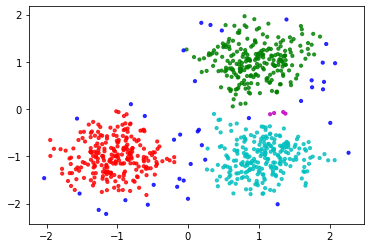

In [26]:
clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()